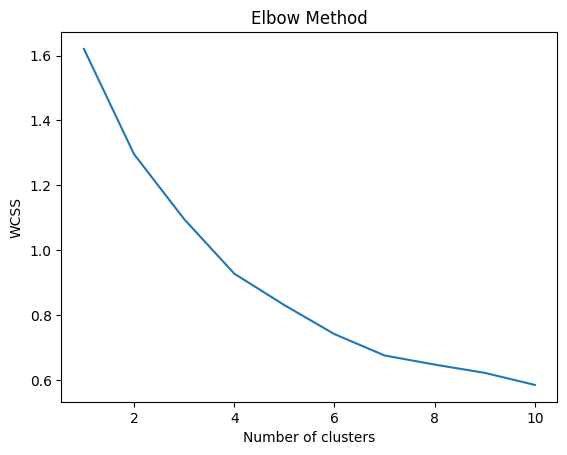

     CustomerID  Cluster
0             1        0
1             2        4
2             3        0
3             4        4
4             5        0
..          ...      ...
195         196        2
196         197        1
197         198        2
198         199        1
199         200        2

[200 rows x 2 columns]


In [2]:
import pandas as pd
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Mall_Customers.csv')

# Preprocess data
X = df.drop(['CustomerID', 'Gender'], axis=1)
X_scaled = StandardScaler().fit_transform(X)

# Elbow Method to find optimal k
wcss = [kmeans(X_scaled, i)[1] for i in range(1, 11)]

# Plot Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply k-means with k=5
k = 5
centroids, _ = kmeans(X_scaled, k)
df['Cluster'], _ = vq(X_scaled, centroids)

# Show clusters
print(df[['CustomerID', 'Cluster']])
